**Identifying Consumer Behavior**

The dataset that we'll be working with contains 200 customer data. We are going to be focusing on their annual income vs spending behavior and our goal is to identify groups of customers

**Types of Hierarchical Clustering**

**1. Agglomerative Clustering (bottom-up):**

a. Each individual data point starts as an individual cluster
b. Merge each two closest clusters into a new combined cluster
c. Eventually, all points are combined into a single cluster

**2. Divisive Clustering (top-down):**

a. All points are combined into a single cluster
b. Then the most dissimilar data points being to split off into
different clusters
c. Keep splitting until each individual data point is its own
cluster

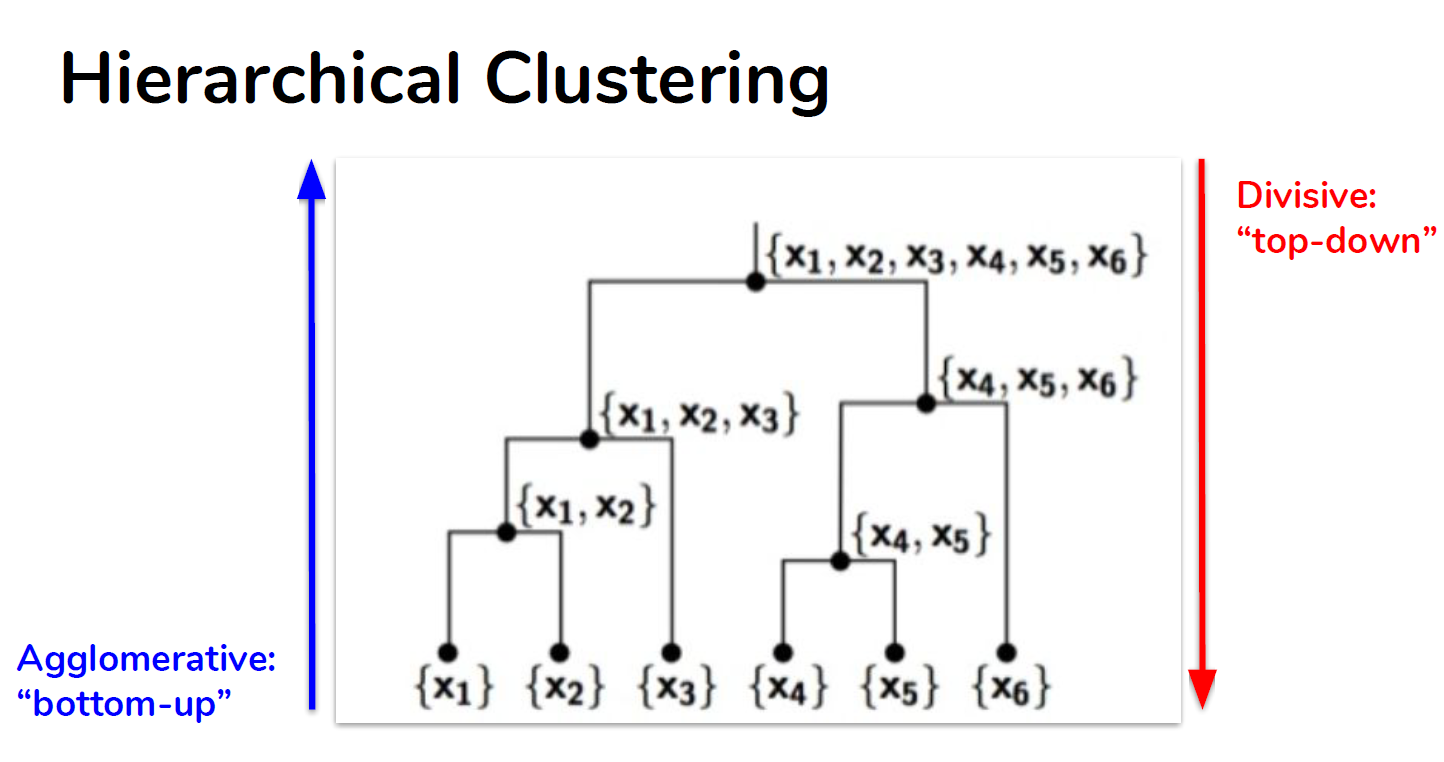

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
# Importing the dataset
print(os.listdir("../input"))
# Importing the dataset
df = pd.read_csv('../input/Mall_Customers.csv')
df.head()

In [ ]:
print ("The Shape of our dataset is: " + str(df.shape))

In [ ]:
# Create new dataframe of annual income and spending score
X_spend = df[['Annual Income (k$)','Spending Score (1-100)']]
X_spend.head()

**Dendogram - Finding Optimal Number of Clusters**

Dendrograms can help you decide
the optimal number of clusters for
your dataset by showing explicitly
the hierarchy of the clusters.Linking the clusters together will form a hierarchical construct known
as a Dendrogram

**How It Works**
1. Assign K data points to K different
clusters, where each data point
becomes its own cluster
2. Then, two data points with minimum
distance between them are merged
into a single cluster
3. Then, two clusters with minimum
linkage distance between them are
merged into a single cluster
Repeat this process until there is only one
single cluster

DONE - Hierarchy of clusters formed!

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as hcd
dendrogram = hcd.dendrogram(hcd.linkage(X_spend, metric='euclidean', method = 'ward'))
plt.title('Dendrogram', size=20)
plt.xlabel('Customers', size=15)
plt.ylabel('Euclidean Distances', size=15)
plt.show()

**Apply Agglomerative Clustering**

n_clusters = 3

In [ ]:
# Fitting Hierarchical Clustering with 3 Clusters to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
X_spend['Cluster'] = hc.fit_predict(X_spend)

In [ ]:
# Examine new dataframe with cluster column
X_spend.head()

**Visualizing the Clusters**

In [ ]:
# Define cluster colors
hc_colors = ['green' if c == 0 else 'blue' if c == 1 else 'purple' if c == 2 else 'black' if c == 3 else 'red' for c in X_spend.Cluster]

# Plot the scatter plot & clusters
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)", data=X_spend, alpha=0.25, color = hc_colors)
plt.xlabel("Annual Income (k$)", size=15)
plt.ylabel("Spending Score (1-00)", size=15)
plt.title("Clusters of Spenders (3)", size=25)
plt.show()

**Apply Agglomerative Clustering**

n_clusters = 5


In [ ]:
# Fitting Hierarchical Clustering with 5 Clusters to the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
X_spend['Cluster'] = hc.fit_predict(X_spend)
# Define cluster colors
hc_colors = ['green' if c == 0 else 'blue' if c == 1 else 'purple' if c == 2 else 'black' if c == 3 else 'red' for c in X_spend.Cluster]

# Plot the scatter plot & clusters
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)", data=X_spend, alpha=0.25, color = hc_colors)
plt.xlabel("Annual Income (k$)", size=15)
plt.ylabel("Spending Score (1-00)", size=15)
plt.title("Clusters of Spenders (5)", size=25)
plt.show()

**Summary and Speculations**

It looks like the cluster count of 5 seems a bit more reasonable.

Our customers can be seen as:

People who are earning less that are spending less, 
People who are earning less are spending more,
People who earn an average amount and are spending an average amount,
People who earn more and are spending less,
People who earn more and spending more.

We can use these insights to do a deeper dive into these clusters & understand our consumers.

Looks like the group of people who have high spending habits and also don't earn as much are the young adults (median age - 22)

In [ ]:
df['cluster'] = X_spend['Cluster']
df[df['cluster']==3].describe()

**Hierarchical Clustering Pros/Cons**

**PROS**:
● No prior knowledge of cluster
size needed
● Easy to understand
● Easy to visualize with
dendrogram
● Works well on small data sets

**CONS**:
● Really slow on large data sets and high
dimensions
● May be difficult to identify correct
amount of clusters from dendrogram
● Difficult to handle different sized
clusters and weird shapes